# D2.5 Significant Figures
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D2.5.1 Motivation
Actual measurements will always have uncertainties associated with them. For example, using a common ruler (see
below) and use the centimeter (cm) scale to measure the diameter of the moon, we would say it is a little bit more
than 8 cm. A confident person may estimate it to be 8.2 cm. If we include the millimeter (mm) scale as well, we can
say that the diameter is somewhere between 8.1 cm and 8.2 cm. We may say it is 8.15 cm.

<img src="fig1.png" width="400">

>**In reporting the measurement, we should include the measurable digit (cm in the first case and mm in the second
>case) as well as the one estimated position beyond the smallest measurable digit**.


In the example above, that would imply reporting the numbers as 8.2 cm and 8.15 cm, respectively, knowing that
our uncertainties (or errors) are in the last digits.

The above measurements does not state the uncertainty explicitly but it is suggested by the significant figures used.
For example, 8.15 cm has three significant figures (we will see the rules later) in the reported value. This measurement tells us that we are correct to the first two number (8.1 cm), while the third digit is uncertain.

<div style="background-color:#ffe6e6; border-left:6px solid #990000; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">⚠️ Important Warning — Significant Figures</h3>

In the following sections, we will learn how to handle significant figures in arithmetic. It is essential to understand that **rounding or adjusting significant figures must occur only at the end of a calculation**, when the final result is obtained.  
If you round intermediate values too early, you lose information and introduce avoidable error into your final answer.  
In short: **do all calculations with full precision and apply significant-figure rules only once—at the end.**

</div>

### Significant Figures vs. Standard Deviation

Significant figures are the digits in a number that convey meaningful information about its precision. These include all non-zero digits, any zeros between them, and trailing zeros in a decimal number. Significant figures are critical in scientific calculations because they reflect the accuracy of the instruments used to obtain the measurements. When performing arithmetic operations, the result should be rounded to the least number of significant figures in any of the inputs, ensuring consistency with the data's precision.

In the next section, we will disucss standard deviation, which is a statistical measure that quantifies the spread or dispersion of a dataset relative to its mean (average). It provides insight into how much the individual data points differ from the mean. A low standard deviation indicates that the data points are clustered closely around the mean, while a high standard deviation suggests greater variability. Mathematically, the standard deviation is calculated by taking the square root of the average of the squared differences between each data point and the mean. It is widely used in fields such as finance, science, and engineering to analyze variability and predict trends. 

Significant figures and standard deviation both address aspects of precision and variability, but in fundamentally different ways. **Significant figures relate to the precision of individual measurements or calculations, reflecting the resolution of the tools used**. They are primarily concerned with how numbers are expressed, ensuring accuracy without overstating the data's precision. In contrast, **standard deviation deals with the variability within a dataset, providing a statistical measure of how data points are distributed around a central value**. While significant figures are important for conveying the precision of a single value, standard deviation helps assess the reliability and consistency of a group of measurements. Together, they offer complementary insights into data quality and accuracy.
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## 2.5.2 A Note on Accuracy and Precission
Is our measurement above **accurate** or **precise**? In everyday language, these two words are often used almost interchangeably, but in science they have very different meanings and describe different aspects of measurement quality. The following animation illustrate this:

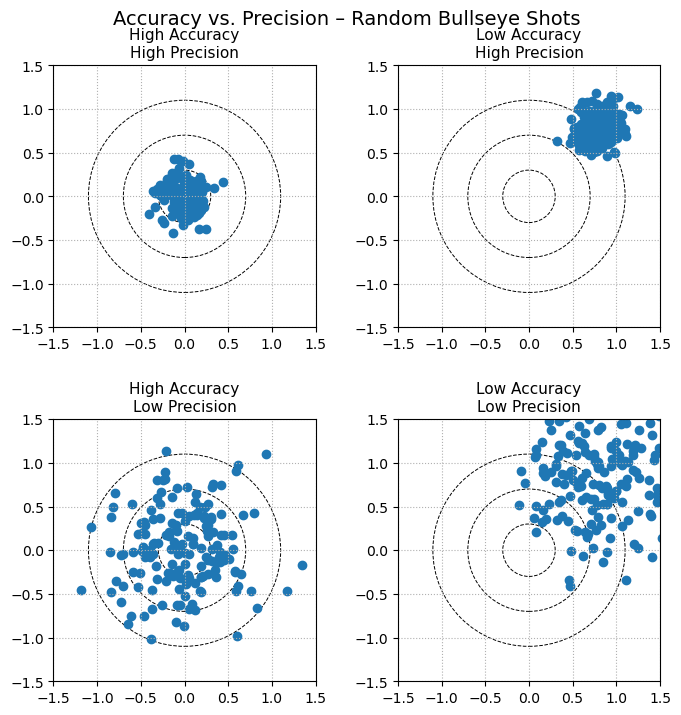

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def generate_shots(center, spread, n):
    x0, y0 = center
    x = np.random.normal(x0, spread, n)
    y = np.random.normal(y0, spread, n)
    return x, y

# --- Figure Setup ---
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

titles = [
    "High Accuracy\nHigh Precision",
    "Low Accuracy\nHigh Precision",
    "High Accuracy\nLow Precision",
    "Low Accuracy\nLow Precision",
]

target_center = (0, 0)

scenarios = [
    {"center": (0, 0),   "spread": 0.15},
    {"center": (0.8,0.8),"spread": 0.15},
    {"center": (0, 0),   "spread": 0.45},
    {"center": (0.8,0.8),"spread": 0.45},
]

scatter_plots = []
shot_data = []

axis_lim = 1.5

# Create axes and bullseyes
for ax, title in zip(axes, titles):
    ax.set_title(title, fontsize=11)
    ax.set_xlim(-axis_lim, axis_lim)
    ax.set_ylim(-axis_lim, axis_lim)
    ax.set_aspect('equal')
    ax.grid(True, linestyle=":")

    for r in [0.3, 0.7, 1.1]:
        ax.add_patch(plt.Circle(target_center, r, fill=False, linestyle="--", linewidth=0.7))

    sc = ax.scatter([], [])
    scatter_plots.append(sc)
    shot_data.append([[], []])   # store x and y shots

# Fix spacing between rows so titles do NOT overlap
plt.subplots_adjust(hspace=0.35, wspace=0.25)
fig.suptitle("Accuracy vs. Precision – Random Bullseye Shots", fontsize=14, y=0.95)

# --- Animation ---
def update(frame):
    for i, scenario in enumerate(scenarios):
        x_new, y_new = generate_shots(scenario["center"], scenario["spread"], 4)
        shot_data[i][0].extend(x_new)
        shot_data[i][1].extend(y_new)
        scatter_plots[i].set_offsets(np.column_stack(shot_data[i]))
    return scatter_plots

ani = FuncAnimation(fig, update, frames=40, interval=300, blit=False)

HTML(ani.to_jshtml())

Now imagine each shot as one scientist’s measurement of the same physical quantity:

- **Accuracy** tells us **how close the average of our measurements is to the true value** (the center of the target).  
  - High accuracy → the “cloud” of points is centered near the true value.  
  - Low accuracy → the entire cluster is shifted away from the true value, often due to a **systematic error** (e.g., a biased instrument).

- **Precision** tells us **how tightly the measurements cluster together**, regardless of whether they are centered on the true value.  
  - High precision → points fall in a tight group (low spread).  
  - Low precision → points are scattered widely (high spread), even if the average happens to be near the true value.

In terms of the animation:  
- A tight cluster near the center corresponds to **high accuracy and high precision**.  
- A tight cluster far from the center corresponds to **low accuracy but high precision** (good repeatability, bad calibration).  
- A wide, messy cluster roughly centered on the target corresponds to **high accuracy but low precision**.  
- A wide cluster far from the center corresponds to **low accuracy and low precision**.

---

To make this concrete, imagine we circulate an object and a **severely flawed ruler** around the classroom. Each student measures its length:

- Because everyone is reading the same flawed scale, the results would likely be **similar to each other** (small spread) but **all shifted away from the true length**.  
  - This is a case of **high precision but low accuracy**.  
  - The instrument introduces a **systematic error** — the scale is biased, so even careful work gives the wrong answer.

If instead we use a **high-quality, well-calibrated ruler**, and students measure carefully:

- We would expect the measurements to be both **clustered together** (high precision) and **close to the true value** (high accuracy).  
- Any remaining spread is then mostly due to **random error**: reading the scale slightly differently, parallax, hand shakiness, etc.

In real experiments, we often care about both:
- **Precision** (how “noisy” our data are), which is related to standard deviation and random error.
- **Accuracy** (how close our mean value is to the true value), which is limited by systematic errors and calibration.

---

If you want to dig deeper into uncertainty and error analysis—how errors propagate through calculations, how to estimate and report uncertainty, and how to formally quantify accuracy vs. precision—courses in **experimental physics** and **statistics** are invaluable. They cover tools like error bars, confidence intervals, residual plots, and more advanced visualizations such as the one shown below:

<br>
<img src="fig3.png" width="400">

[From Wikipedia: Accuracy and precision](https://en.wikipedia.org/wiki/Accuracy_and_precision)

---

<div style="background-color:#FFF7D6; border-left:6px solid #8C6D1F; padding:14px; border-radius:4px;">

<h3 style="margin-top:0; color:#000000;">A Light-Hearted Look at Precision</h3>

>A mathematician, a physicist, and a statistician went hunting for deer. When they chanced upon one buck lounging
about, the mathematician fired first, missing the buck's nose by a few inches. The physicist then tried his hand,
and missed the tail by a wee bit. The statistician started jumping up and down saying:  
<b>"We got him! We got him!"</b>

>A group of physicists were at a conference being held in Central Australia. As part of the conference entertainment,
they were taken on a tour of the famous rock, Uluru.  
"This rock," announced the guide, "is 50,000,004 years old."

>The physicists—always impressed by precise numbers—were astounded.  
"How do you know the age of the rock so precisely?"

>"Easy!" came the reply.  
"When I first came here, they told me it was 50 million years old.  
I've been working here for four years now."

</div>

It should hopefully be quite obvious that the above are jokes. Simply adding the estimated age of the rock and the
elapsed 4 years is incorrect in terms of significant figures. In the following section, we will see how to apply
significant-figure rules properly when performing basic arithmetic operations.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D2.5.3 General Rules for Significant Figures

Only **measured numbers** and numbers **derived from measured quantities** are subject to significant-figure rules.  
Exact numbers — such as counted quantities (e.g., “12 students”), defined values (e.g., “1 hour = 60 minutes”), and mathematical constants (e.g., $\pi$, $e$) — contain no measurement uncertainty and therefore **do not limit** the number of significant figures in a calculation.

Below are the standard rules for identifying significant figures in measured numbers:

### **1. All non-zero digits are significant.**  
Examples:  
`3.47` has 3 significant figures.  
`9281` has 4 significant figures.

### **2. Zeros between non-zero digits are significant.**  
Examples:  
`101.3` has 4 significant figures.  
`40.07` has 4 significant figures.

### **3. Leading zeros are *not* significant.**  
(They merely locate the decimal point.)  
Examples:  
`0.0049` has 2 significant figures.  
`0.0102` has 3 significant figures.

### **4. Trailing zeros require careful interpretation.**  

- **If a decimal point is present:**  
  Trailing zeros **are significant**.  
  Examples:  
  `12.300` has 5 significant figures.  
  `0.0800` has 3 significant figures.

- **If no decimal point is present:**  
  The significance of trailing zeros **depends on context**.  
  For example, `1500` might have 2, 3, or 4 significant figures depending on how the measurement was recorded or reported.  
  Without clarification, trailing zeros in such numbers **should not be assumed significant**.

These rules help ensure that measurements communicate the correct level of precision and that we do not imply more certainty than our instruments provide.

---

<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">

<h3 style="margin-top:0; color:#000000;">Example — Identifying Significant Figures</h3>

Consider the following measurements and determine the number of significant figures in each:

1. **Measured length:** `3.470`  
   - All non-zero digits are significant.  
   - Trailing zero is significant (decimal present).  
   **→ 4 significant figures**

2. **Mass reading:** `0.0049`  
   - Leading zeros are not significant.  
   **→ 2 significant figures**

3. **Calibrated instrument output:** `40.07`  
   - Zeros between non-zero digits are significant.  
   **→ 4 significant figures**

4. **Recorded measurement:** `1500`  
   - No decimal point; significance of trailing zeros depends on context.  
   - Without additional information, assume only non-zero digits are significant.  
   **→ 2 significant figures (unless clarified otherwise)**

These examples illustrate how significant-figure rules ensure that measurements express the correct level of precision and do not overstate certainty.

</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 1 – How Many Significant Figures?</h3>

Determine the number of significant figures in each of the following measured quantities.  
Apply the rules from Section D1.3.3 carefully.

1. `0.02050`  
2. `407.0`  
3. `5.030 × 10^3`  
4. `1200`  
5. `0.009080`

After you decide on the number of significant figures for each value, check your reasoning using the solution guide below.

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
Solutions
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

**1. `0.02050`**  
- Leading zeros are not significant.  
- Trailing zero is significant (decimal shown).  
→ **4 significant figures**

**2. `407.0`**  
- All non-zero digits are significant.  
- Zero between 4 and 7 is significant.  
- Trailing zero is significant (decimal shown).  
→ **4 significant figures**

**3. `5.030 × 10^3`**  
- All digits in the mantissa (5.030) follow standard rules.  
- Trailing zero is significant (decimal shown).  
→ **4 significant figures**

**4. `1200`**  
- No decimal point; trailing zeros ambiguous.  
- Without context, assume only non-zero digits are significant.  
→ **2 significant figures**  
(*Unless explicitly written as `1.200 × 10^3` or `1200.` to clarify.*)

**5. `0.009080`**  
- Leading zeros are not significant.  
- Zeros between 9 and 8 are significant.  
- Trailing zero is significant (decimal shown).  
→ **4 significant figures**

</div>
</details>

</div>


<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## D2.5.4 Rounding

Rounding appears simple, but when we apply it carefully to **significant figures**, several important details arise — especially with **tie cases** (numbers ending in 5) and with **negative numbers**.

Let us begin with a straightforward example. Suppose we want to round

`12.5678`

to **four significant figures**. The first four digits are 1, 2, 5, 6. The next digit is 7, which is greater than 5, so we round up:

$$12.5678 \rightarrow 12.57$$

This matches the everyday rule:

- If the next digit is **greater than 5**, round up.  
- If the next digit is **less than 5**, leave the number as is.  
- If the next digit is **exactly 5**, we have a **tie**, and a tie-breaking rule is required.

If we instead round `12.5678` to **two significant figures**, the third digit is 5 (followed by non-zero digits), so we round up:

$$12.5678 \rightarrow 13$$

---

### Our Rounding Convention in This Course

In most math and science classes, students learn:

> If the next digit is **5 or greater**, round up.  
> If the next digit is **less than 5**, round down.

This rule is called **round half up**, and it is the convention we will use.

Importantly, this rule applies to **both positive and negative numbers**. Examples (rounded to the nearest integer):

- $12.5 \rightarrow 13$
- $12.4 \rightarrow 12$
- $-12.5 \rightarrow -12$
- $-12.6 \rightarrow -13$

Many people mistakenly round $-12.5$ to $-13$, following a “round away from zero” intuition. But *round half up* always rounds **toward positive infinity**, meaning tied negative numbers move **toward zero**, not away from it.

Other rounding conventions exist (round half down, round half away from zero, round half to even, stochastic rounding, etc.), but for physics and chemistry laboratory work, **round half up** is the most common and matches what students already know.

---

<div style="background-color:#ffe6e6; border-left:6px solid #990000; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">⚠️ Danger — Rounding in Computers vs. Rounding in This Class</h3>

Although we use **round half up** in this course, most computers — including Python’s built-in `round()` for floating-point numbers — use **round half to even** (also called “banker’s rounding”).  
This rule rounds 0.5 values to the *nearest even* integer:

- $12.5 \rightarrow 12$  
- $13.5 \rightarrow 14$  
- $-12.5 \rightarrow -12$  
- $-13.5 \rightarrow -14$

This means Python’s output may **not match** what you obtain when applying the round-half-up rule used for significant figures.

For this course:

- When rounding **by hand** or when rounding results for **significant figures**, use **round half up**.  
- When using Python, be aware that differences can occur because the computer is following **round half to even**.

</div>

<br>

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 2 – Rounding to Significant Figures</h3>

Round each number to the specified number of significant figures.  
Use the **round half up** rule.

1. `48.351` → 3 significant figures  
2. `0.009876` → 2 significant figures  
3. `-12.457` → 3 significant figures  
4. `-0.004950` → 2 significant figures  
5. `-125.5` → 3 significant figures  

---

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
Solutions
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

**1. `48.351` → 3 significant figures**  
Digits kept: 4, 8, 3. Next digit is 5 (with digits following), so round up.  
**Result:** $48.4$

**2. `0.009876` → 2 significant figures**  
Significant digits begin at 9. First two are 9 and 8; next digit is 7 (> 5).  
**Result:** $0.0099$

**3. `-12.457` → 3 significant figures**  
Digits kept: 1, 2, 4. Next digit is 5 followed by 7, so round up.  
**Result:** $-12.5$

**4. `-0.004950` → 2 significant figures**  
Significant digits: 4 and 9. Next digit is 5, followed only by zeros (a tie). Round half up: round 9 → 10.  
**Result:** $-0.0049$

**5. `-125.5` → 3 significant figures**  
Digits kept: 1, 2, 5. Next digit is exactly 5 with no digits after (tie). Round half up.  
**Result:** $-125$

These examples illustrate why a **consistent tie-breaking rule** is essential and why **negative numbers require special attention**.

</div>
</details>

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D2.5.5 Significant Figures: Multiplication and Division

When performing **multiplication** or **division**, the number of significant figures in the final result is determined by the **factor with the fewest significant figures**. This rule ensures that the precision of the answer does not imply more certainty than the least precise measurement used in the calculation.

For example, if you multiply a value with **3 significant figures** by a value with **2 significant figures**, the final result must be reported with **2 significant figures**, because the second value limits the overall precision.

### Why this rule makes sense
Multiplication and division scale numbers. Any uncertainty in one factor is passed proportionally into the final result. The factor with the **least precision** introduces the **largest relative uncertainty**, so it controls the precision of the product or quotient.

### Power and root operations
This same idea applies to **power operations**:

- When computing a quantity such as  
  $$A^2,\quad A^3,\quad \sqrt{A},\quad A^{-1},$$  
  the number of significant figures in the final answer must match the number of significant figures in the original measured value.

Power operations do not introduce new precision; they simply propagate the uncertainty from the original measurement.

<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Examples – Significant Figures in Multiplication and Division</h3>

Below are several worked examples illustrating how to apply the rule:

> **The final answer must have the same number of significant figures as the factor with the fewest significant figures.**

---

**1.**  
$4.56 \times 1.4$  
- $4.56$ has **3** significant figures  
- $1.4$ has **2** significant figures  
→ Final answer must have **2 significant figures**  

$$4.56 \times 1.4 = 6.384 \approx 6.4$$

---

**2.**  
$\dfrac{0.00340}{2.15}$  
- $0.00340$ has **3** significant figures  
- $2.15$ has **3** significant figures  
→ Final answer has **3 significant figures**

$$\frac{0.00340}{2.15} = 0.001581 \approx 0.00158$$

---

**3.**  
$58.2 \div 3.0$  
- $58.2$ has **3** significant figures  
- $3.0$ has **2** significant figures  
→ Final answer has **2 significant figures**

$$58.2 \div 3.0 = 19.4 \approx 19$$

---

**4.**  
$(7.15)^2$  
- $7.15$ has **3** significant figures  
→ $(7.15)^2$ must have **3 significant figures**

$$(7.15)^2 = 51.1225 \approx 51.1$$

---

**5.**  
$\sqrt{0.00840}$  
- $0.00840$ has **3** significant figures  
→ Square root must have **3 significant figures**

$$\sqrt{0.00840} = 0.0916515 \approx 0.0917$$

</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px; margin-top:18px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 3 – Multiplication and Division with Significant Figures</h3>

Use the rule for multiplication and division:

> **Your final answer must have the same number of significant figures as the least precise factor.**

Compute each expression and round properly.

1. $3.44 \times 2.1$  
2. $\dfrac{0.00450}{6.2}$  
3. $15.82 \div 4.0$  
4. $(9.50)^2$  
5. $\sqrt{0.00320}$

---

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
Solutions
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

**1. $3.44 \times 2.1$**  
- $3.44$ has **3** sig figs  
- $2.1$ has **2** sig figs  
→ Answer must have **2** sig figs  

$$3.44 \times 2.1 = 7.224 \approx 7.2$$

---

**2. $\frac{0.00450}{6.2}$**  
- $0.00450$ has **3** sig figs  
- $6.2$ has **2** sig figs  
→ Answer has **2** sig figs  

$$\frac{0.00450}{6.2} = 0.0007258 \approx 0.00073$$

---

**3. $15.82 \div 4.0$**  
- $15.82$ has **4** sig figs  
- $4.0$ has **2** sig figs  
→ Answer has **2** sig figs  

$$15.82 \div 4.0 = 3.955 \approx 4.0$$

---

**4. $(9.50)^2$**  
- $9.50$ has **3** sig figs  
→ Answer has **3** sig figs  

$$(9.50)^2 = 90.25 \approx 90.3$$

---

**5. $\sqrt{0.00320}$**  
- $0.00320$ has **3** sig figs  
→ Answer has **3** sig figs  

$$\sqrt{0.00320} = 0.0565685 \approx 0.0566$$

</div>
</details>

</div>

---
<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Example – Special Case: Determining Significant Figures From Context</h3>

When working with multiplication and division, **context determines whether a number contributes significant figures**. Exact numbers do *not* limit precision, while measured numbers do.

---

**1. Exact numbers**  
Suppose we multiply two exact values:

$$10 \times 20 = 200$$

Since both 10 and 20 are *defined* quantities (for example, 10 objects and 20 objects), they have **infinite significant figures**.  
Therefore, the result **200 is exact**.

---

**2. Measured numbers with 2 significant figures**  
Now assume both 10 and 20 were obtained from measurement devices and each has **2 significant figures**:

- $10$ → 2 significant figures  
- $20$ → 2 significant figures  

The product is still:

$$10 \times 20 = 200$$

But now the number **200 must be interpreted as having 2 significant figures**, because the calculation is limited by the least precise measurement.

---

**3. Mixed precision (2 significant figures × 1 significant figure)**  
Finally, suppose:

- $10$ has **2 significant figures**  
- $20$ has **1 significant figure**  

The product remains:

$$10 \times 20 = 200$$

However, the **result may only contain 1 significant figure**, since it is limited by the measurement with the fewest significant digits.

To express this clearly, the number may need to be written in scientific notation:

$$200 \rightarrow 2 \times 10^2 \quad \text{(1 significant figure)}$$

---

This example shows that when working with measured quantities, the number of significant figures in the **inputs**, not the digits in the **numerical output**, determines the precision we are allowed to report.

</div>

<br>

### D2.5.6 Precision Hidden in Plain Sight — Trailing Zeros Without a Decimal Point

The previous example highlights a subtle but important issue: **the same written number can represent very different levels of precision**, depending entirely on context. A value like `200` might contain 1, 2, or 3 significant figures, but nothing in its plain decimal form tells us which interpretation is correct. Important information about the **precision** of the measurement is therefore lost.

This ambiguity arises because **trailing zeros without a decimal point are not automatically significant**. The number `150` could mean:

- 1 significant figure (rounded to the nearest hundred),
- 2 significant figures (rounded to the nearest ten), or
- 3 significant figures (an exact measurement to the ones place).

But the written form provides no way to know which is intended.

### Removing Ambiguity

Scientists remove this ambiguity in one of two ways:

1. **Add a decimal point**  
   - `150.` → **three** significant figures  
   - `200.` → **three** significant figures  

2. **Use scientific notation**, which encodes precision directly:  
   - $2\times10^2$ → **1 significant figure**  
   - $2.0\times10^2$ → **2 significant figures**  
   - $2.00\times10^2$ → **3 significant figures**

### Why This Matters

**Scientific notation fixes the problem** because the coefficient $a$ in  
$$a\times10^n$$  
contains exactly the intended significant digits. This preserves both the **value** of the quantity and the **precision** with which it was measured, eliminating the ambiguity inherent in decimal forms like `150` or `200`.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D2.5.7 Significant Figures: Addition and Subtraction

For **addition** and **subtraction**, the rule for significant figures is *completely different* from the rule for multiplication and division.

In this case, it is **not** the total number of significant figures that matters.  
Instead, the precision of the final answer is determined by the **least precise decimal place** among the terms being added or subtracted.

In other words:

> **The result must be rounded to the least significant decimal place present in any of the numbers used in the calculation.**

This reflects the idea that you cannot report a final answer that is more precise (more decimal places) than your least precise measurement. Even if a number has many significant figures, if its last reliable digit is in the tenths place, then the answer cannot be more precise than the tenths place.

---

<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Examples – Addition and Subtraction with Significant Figures</h3>

Below are several worked examples illustrating how to determine the correct number of decimal places.

---

**1.**  
$12.45 + 3.2$

- $12.45$ is precise to the hundredths place  
- $3.2$ is precise to the tenths place  
→ Answer must be rounded to the **tenths** place  

$$12.45 + 3.2 = 15.65 \rightarrow 15.7$$

---

**2.**  
$0.0045 + 0.00231$

- $0.0045$ is precise to the **fourth** decimal place  
- $0.00231$ is precise to the **fifth** decimal place  
→ Round to the **fourth** decimal place  

$$0.0045 + 0.00231 = 0.00681 \rightarrow 0.0068$$

---

**3.**  
$148.2 - 0.035$

- $148.2$ is precise to the **tenths** place  
- $0.035$ is precise to the **thousandths** place  
→ Round to the **tenths** place  

$$148.2 - 0.035 = 148.165 \rightarrow 148.2$$

---

**4.**  
$5.000 - 4.1$

- $5.000$ is precise to the **thousandths** place  
- $4.1$ is precise to the **tenths** place  
→ Round to the **tenths** place  

$$5.000 - 4.1 = 0.900 \rightarrow 0.9$$

---

**5.**  
$1230 + 47$

Here we must examine **decimal places**, not digits.

- $1230$ has no explicit decimal; last reliable digit is in the **tens** place  
- $47$ has last reliable digit in the **ones** place  
→ Answer must be rounded to the **tens** place  

$$1230 + 47 = 1277 \rightarrow 1280$$

</div>

---

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 4 – Addition and Subtraction with Significant Figures</h3>

Compute each expression and round according to the rule:

> **Round the final answer to the least precise decimal place of any term in the calculation.**

1. $4.56 + 1.2$  
2. $0.0034 + 0.00081$  
3. $102.3 - 0.04$  
4. $7.000 - 0.82$  
5. $450 + 32$

---

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
Solutions
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

**1. $4.56 + 1.2$**  
- $4.56$ → hundredths  
- $1.2$ → tenths  
→ Round to tenths  

$$4.56 + 1.2 = 5.76 \rightarrow 5.8$$

---

**2. $0.0034 + 0.00081$**  
- $0.0034$ → fourth decimal  
- $0.00081$ → fifth decimal  
→ Round to fourth decimal  

$$0.0034 + 0.00081 = 0.00421 \rightarrow 0.0042$$

---

**3. $102.3 - 0.04$**  
- $102.3$ → tenths  
- $0.04$ → hundredths  
→ Round to tenths  

$$102.3 - 0.04 = 102.26 \rightarrow 102.3$$

---

**4. $7.000 - 0.82$**  
- $7.000$ → thousandths  
- $0.82$ → hundredths  
→ Round to hundredths  

$$7.000 - 0.82 = 6.180 \rightarrow 6.18$$

---

**5. $450 + 32$**  
- $450$ → tens place  
- $32$ → ones place  
→ Round to tens  

$$450 + 32 = 482 \rightarrow 480$$

</div>
</details>

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">


## D2.5.7 Combined Operations

Many calculations in physics involve a mix of **multiplication/division** and **addition/subtraction**.  
Because these two types of operations follow **different significant-figure rules**, we must apply the correct rule at the correct stage.

The process is:

1. **Perform multiplication and division first**, following the rule:  
   > The term with the fewest significant figures determines the number of significant figures in that intermediate result.

2. **Carry extra digits in intermediate steps** so that rounding does not accidentally change the final answer.  
   A good rule of thumb is to keep **one extra digit** beyond what is justified.

3. **Perform addition or subtraction last**, following the rule:  
   > Round the final answer to the least precise decimal place among the terms being added or subtracted.

4. **Round only once, at the end**, using the correct place-value rule.

This procedure prevents rounding errors and ensures that precision is neither lost too early nor artificially inflated.

---

<div style="background-color:#e6f0ff; border-left:6px solid #003366; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Important Note — Marking the Last Significant Digit</h3>

In multi-step calculations, it is standard scientific practice to **mark the final significant digit with an overline** (a bar).  
This notation helps distinguish between:

- **digits that truly carry significance**, and  
- **extra “guard digits”** that are kept temporarily to avoid premature rounding.

For example:

- $9.\overline{5}8$ indicates that **5** is the last significant digit  
- $0.02\overline{1}1$ indicates that **1** is the last significant digit  
- $19.\overline{4}0$ indicates that **4** is the last significant digit  

This convention is widely used in physics, chemistry, engineering, and metrology, and greatly reduces rounding errors when performing combined operations.

</div>

<br>

<div style="background-color:#e0f7fa; border-left:6px solid #006a80; padding:14px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Examples — Combined Operations with Significant Figures </h3>

(Intermediate results show an **overline** marking the true last significant digit)

---

**1.**  
$(4.56 \times 2.1) + 3.2$

- Multiplication:  
  $$4.56 \times 2.1 = 9.576$$  
  True sig-fig limit = 2 sig figs → last sig digit is the **tenths place**  
  Keep one extra digit: use  
  $$9.\overline{5}8$$
- Addition (least precise decimal: tenths):  
  $$9.\overline{5}8 + 3.2 = 12.78 \rightarrow 12.8$$

**Final answer:** $12.8$

---

**2.**  
$0.00340 \times 6.2 + 0.020$

- Multiplication:  
  $$0.00340 \times 6.2 = 0.02108$$  
  True sig-fig limit = 2 sig figs → last sig digit is the **second nonzero digit**  
  Keep one extra:  
  $$0.02\overline{1}1$$
- Addition (least precise decimal: thousandths):  
  $$0.02\overline{1}1 + 0.020 = 0.0411 \rightarrow 0.041$$

**Final answer:** $0.041$

---

**3.**  
$15.82 - (4.0 \times 3)$ with 3 being an exact number.

- Multiplication:  
  $$4.0 \times 3 = 12.0$$  
  Sig-fig limit = 2 sig figs → last sig digit is the **ones place**  
  Keep one extra decimal:  
  $$1\overline{2}.0$$
- Subtraction (least precise decimal: ones):  
  $$15.82 - 1\overline{2}.0 = 3.82 \rightarrow 4$$

**Final answer:** $4$

---

**4.**  
$(9.50)^2 - 0.82$

- Square:  
  $$(9.50)^2 = 90.25$$  
  Sig-fig limit = 3 sig figs → last sig digit is the **ones place**  
  Keep one extra decimal:  
  $$90.\overline{2}5$$
- Subtraction (least precise decimal: tenths):  
  $$90.\overline{2}5 - 0.82 = 89.43 \rightarrow 89.4$$

**Final answer:** $89.4$

---

**5.**  
$450 + (3.44 \div 2.1)$

- Division:  
  $$3.44 \div 2.1 = 1.638095...$$  
  Sig-fig limit = 2 sig figs → last sig digit is the **ones place**  
  Keep extra decimal:  
  $$1.\overline{6}4$$
- Addition (450 accurate to tens place):  
  $$450 + 1.\overline{6}4 = 451.64 \rightarrow 450$$

**Final answer:** $450$

</div>

<br>

<div style="background-color:#e8f5e9; border-left:5px solid #006633; padding:12px; border-radius:4px;">
<h3 style="margin-top:0; color:#000000;">Box Activity 5 — Combined Operations</h3>

(Show the last significant digit with an overline in your intermediate steps)

Compute each expression and round correctly:

1. $(3.44 \times 2.1) - 1.2$  
2. $7.000 + (0.0034 \times 6.2)$  
3. $102.3 - (0.82 \div 4.0)$  
4. $(0.00320 \times 15.0) + 0.040$  
5. $(58.2 \div 3.0) + 47$

---

<details>
<summary style="background-color:#006633; color:white; padding:8px; border-radius:4px; cursor:pointer;">
Solutions
</summary>

<div style="background-color:#e8f5e9; padding:10px; border-radius:4px; margin-top:6px;">

**1.**  
$3.44 \times 2.1 = 7.224 \rightarrow 7.\overline{2}2$  
$7.\overline{2}2 - 1.2 = 6.02 \rightarrow 6.0$  
**Final:** $6.0$

---

**2.**  
$0.0034 \times 6.2 = 0.02108 \rightarrow 0.02\overline{1}1$  
$7.000 + 0.02\overline{1}1 = 7.0211 \rightarrow 7.021$  
**Final:** $7.021$

---

**3.**  
$0.82 \div 4.0 = 0.205 \rightarrow 0.2\overline{0}5$  
$102.3 - 0.2\overline{0}5 = 102.095 \rightarrow 102.1$  
**Final:** $102.1$

---

**4.**  
$0.00320 \times 15.0 = 0.0480 \rightarrow 0.048\overline{0}$  
$0.048\overline{0} + 0.040 = 0.0880 \rightarrow 0.088$  
**Final:** $0.088$

---

**5.**  
$58.2 \div 3.0 = 19.4 \rightarrow 1\overline{9}.4$  
$1\overline{9}.4 + 47 = 66.4 \rightarrow 66$  
**Final:** $66$

</div>
</details>

</div>

<hr style="height:2px;border-width:0;color:gray;background-color:gray">